# Introducción a la predicción de series de tiempo
En esta lección y la siguiente, aprenderás un poco acerca de la predicción de series de tiempo, una parte interesante y valiosa del repertorio de de un científico de ML, la cual es un poco menos conocida que otros temas. La predicción de series de tiempo es una especie de 'bola de cristal': basada en el rendimiento pasado de una variable como el precio, puedes predecir su valor potencial futuro.

## Introducción
Supóngamos que mantienes un arreglo de parquímetros inteligentes que proveen datos acerca de que tan seguido son usados y con qué duración de tiempo.

¿Qué pasaría si pudieras predecir, basado en el rendimiento pasado del medidor, su valor futuro de acuerdo a las leyes de suministro y demanda?

Predecir de forma precisa cuándo actuar para así lograr tu objetivo es una desafío que podría ser abordado con la predicción de series de tiempo.No haría feliz a la gente que le cobraran más en hora pico cuando están buscando un lugar para estacionarse, ¡pero sería una forma segura de generar ingresos para limpiar las calles!

Exploremos algunos de los tipos de algoritmos de series de tiempo e iniciemos un notebook para limpiar y preparar algunos datos. Los datos que analizarás son tomados de la competencia de predicción de GEFCom2014. Esta consiste de 3 años de carga eléctrica por hora y los valores de temperatura entre el 2012 y 2014. Dados los patrones históricos de carga eléctrica y temperatura, puedes predecir valores futuros de carga eléctrica.

En este ejemplo, aprenderás cómo predecir un paso de tiempo adelante, usando sólo la carga histórica. Antes de iniciar, sin embargo, es útil entender qué está pasando detrás de escena.

## Características de datos de series de tiempo a considerar
Al mirar datos de series de tiempo, puedes notar que tienen ciertas características que necesitas tomar ne consideración y mitigar para entender mejor sus patrones. Si consideras los datos de las series de tiempo como proporcionando potencialmente una 'señal' que quieres analizar, estas características pueden ser interpretadas como 'ruido'. Frecuentemente necesitarás reducir este 'ruido' al compensar algunas de estas características usando ciertas técnicas estadísticas.

Aquí hay algunos conceptos que deberías saber para ser capaz de trabajar con las series de tiempo:

🎓 Tendencias

Las tendencias se definen como incrementos y decrementos medibles en el tiempo. Lee más. En el contexto de las series de tiempo, se trata de cómo usar las tendencias y, si es necesario, eliminarlas.

🎓 Estacionalidad

La estacionalidad se define como fluctuaciones periódicas, tales como prisas de vacaciones que pueden afectar las ventas, por ejemplo. Da un vistazo a cómo los distintos tipos de gráficos muestran la estacionalidad en los datos.

🎓 Valores atípicos

Los valores atípicos están muy lejos de la varianza de datos estándar.

🎓 Ciclos de largo plazo

Independiente de la estacionalidad, los datos pueden mostrar un ciclo de largo plazo como un declive que dura más de un año.

🎓 Varianza constante

En el tiempo, algunos datos muestran fluctuaciones constantes, tales como el uso de energía por día y noche.

🎓 Cambios abruptos

Los datos pueden mostrar un cambio abrupto que puede necesitar mayor análisis. El cierre abrupto de negocios debido al COVID, por ejemplo, causó cambios en los datos.

✅ Aquí hay una muestra de gráfico de series de tiempo mostrando la moneda diaria en juego gastada en algunos años. ¿Puedes identificar alguna de las características listadas arriba en estos datos?
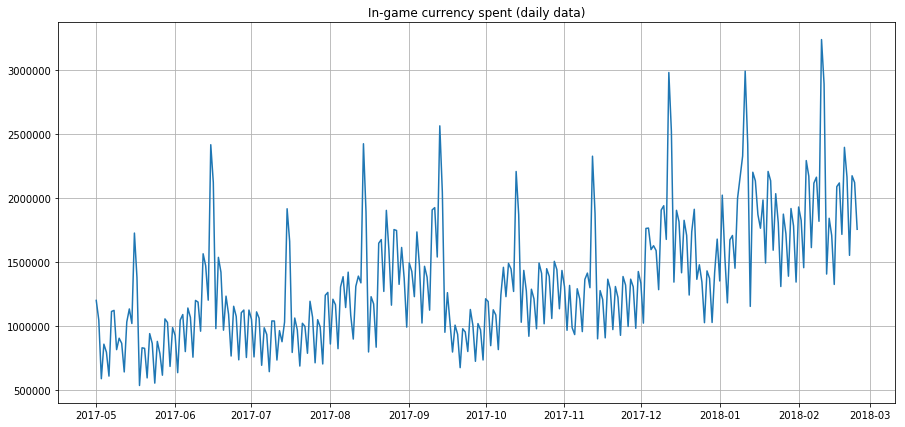

### Ejercicio - comenzando con los datos de uso de energía
Comencemos creando un modelo de series de tiempo para predecir el uso futuro de energía dato su uso pasado.

Los datos en este ejemplo se tomaron de la competencia de predicción GEFCom2014. Consta de 3 años de valores de carga eléctrica y de temperatura medidos por hora entre 2012 y 2014.

Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli y Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.

1. Empieza agregando las bibliotecas que te ayudarán a cargar y visualizar datos

In [3]:
import sys
sys.path.append('./common')

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from common.utils import load_data
%matplotlib inline

2. Ahora, examina los datos como un dataframe llamando load_data() y head():

In [5]:
data_dir = './Data'
energy = load_data(data_dir)[['load']]
energy.head()

,load
2012-01-01 00:00:00,2698.0
2012-01-01 01:00:00,2558.0
2012-01-01 02:00:00,2444.0
2012-01-01 03:00:00,2402.0
2012-01-01 04:00:00,2403.0


3. Ahora, grafica los datos llamando `plot()`:

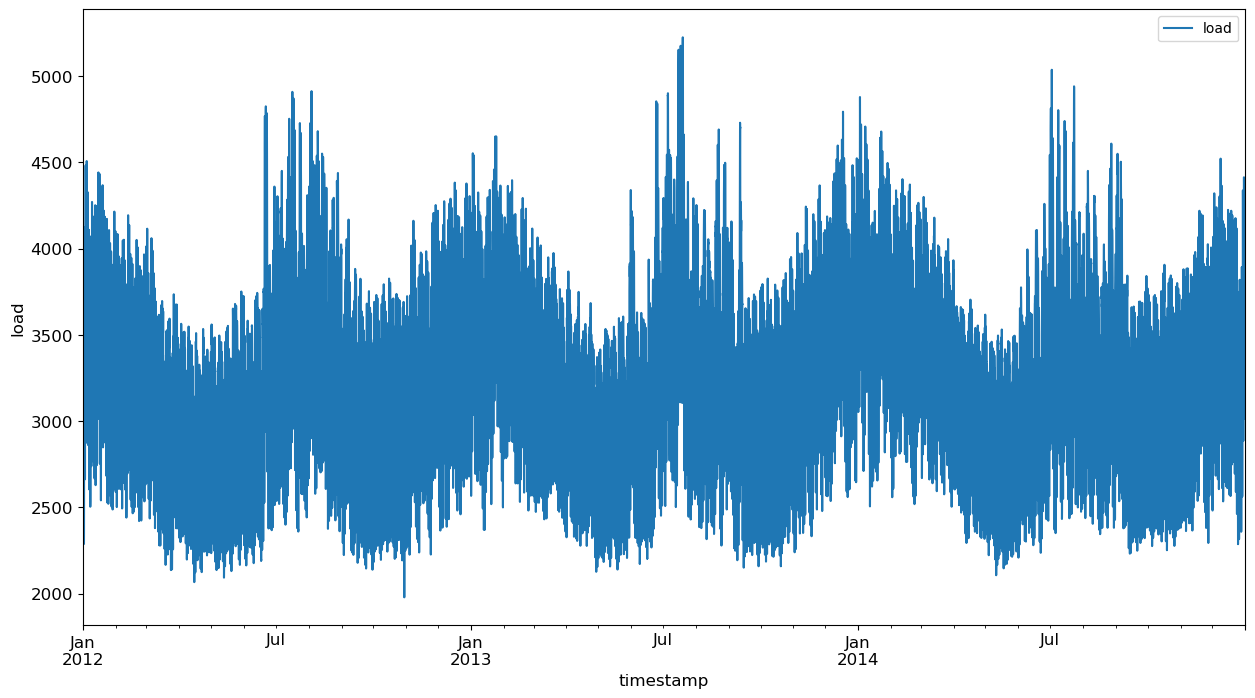

In [6]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

4. hora, grafica la primer semana de Julio de 2014, al proveerla como entrada a energy en el patrón [from date]: [to date]:

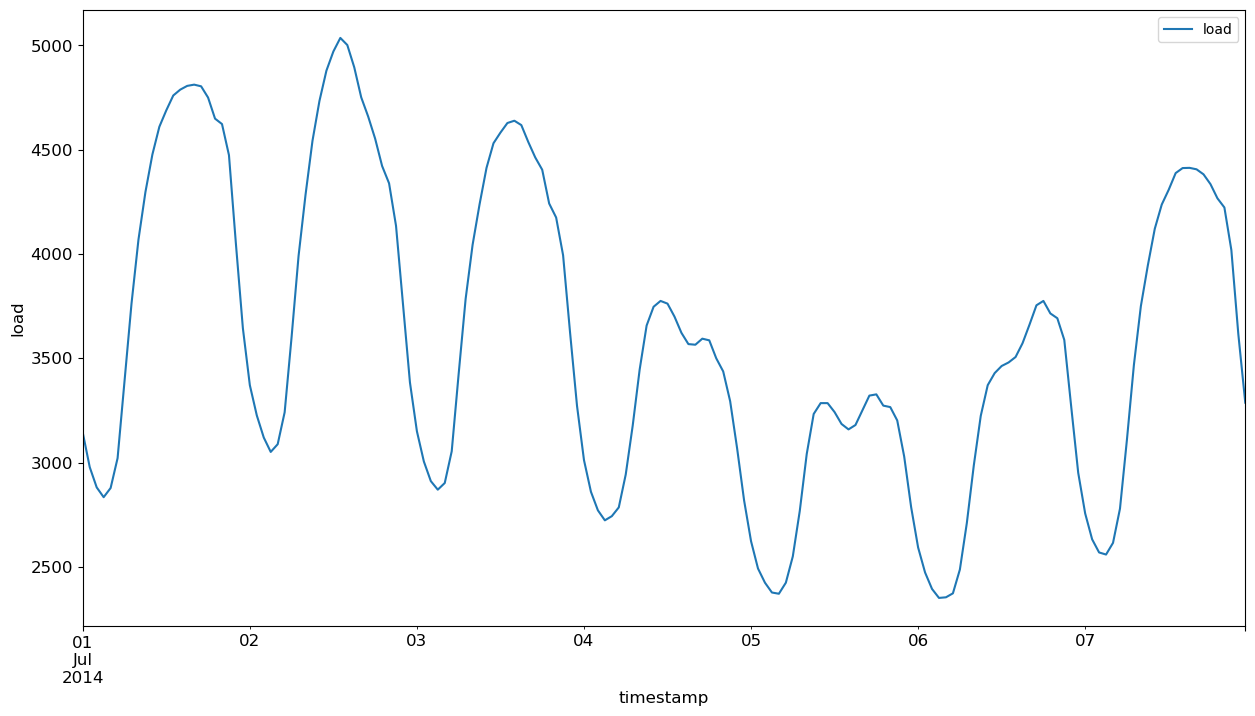

In [7]:
energy['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

¡Un hermoso gráfico! Demos un vistazo a estos gráficos y ve si puedes determinar alguna de las características listadas arriba. ¿Que podemos suponer al visualizar los datos?

En la siguiente lección, se creara un modelo ARIMA para realizar algunas predicciones.